**Part 1: Preparing the data set**

In [0]:
#Loading the IRIS Dataset & Printing the 
from sklearn.datasets import load_iris
iris=load_iris()

In [2]:
#Printing the type of outputs
print(iris.target_names)
print(set(iris.target))

['setosa' 'versicolor' 'virginica']
{0, 1, 2}


In [3]:
#Printing the whole dataset
import pandas as pd
iris_dataset = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_dataset["Flower_Type"] = iris.target
iris_dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Flower_Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [0]:
#Seperating the data into dependent and independent variables
X=iris.data
y=iris.target

In [0]:
#Normalizing the data and splitting into testing and training data set.
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
X_Zscore = pd.DataFrame(X).apply(zscore)
X_Zscore = X_Zscore.to_numpy()
X_train,X_test,y_train,y_test=train_test_split(X_Zscore,y,test_size=0.2)

**Part 2: Defining functions for different Algorithms**


NOTE: In all the functions used to train and produce results for various algorithms,
one paramete caller "print_flag" is used with value (0 or 1). If value is 1 then function will also print Test values
and predicted values for comparison. If 0 then it will only return accuracy_score. By default it is made 0 in order to keep
the results produced compact. While calling individual functions, one can change it to 1 to more detailed analysis.


In [0]:
#Defining logistic regression function
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
def training_function_LogisticRegression(x_train, y_train,x_test,y_test, print_flag=0):
    my_model = LogisticRegression(solver = 'lbfgs',multi_class = 'auto')
    my_model.fit(x_train, y_train)
    y_pred = my_model.predict(x_test)
    
    if(print_flag == 1):
        print(('Pred values: %s'%y_pred))
        print(('Test values: %s'%y_test))  
        print ('Accuracy of Logistic Regression on test set: {:.2f}'.format(metrics.accuracy_score(y_test,y_pred)))
        print('------------------------------------------------')
    
    
    return (metrics.accuracy_score(y_test,y_pred))

In [0]:
#Defining KNN function
from sklearn.neighbors import KNeighborsClassifier
def training_function_KNN(x_train, y_train,x_test,y_test,neighbours, print_flag=0):
    my_model = KNeighborsClassifier(n_neighbors = neighbours)
    my_model.fit(x_train, y_train)
    y_pred = my_model.predict(x_test)
    
    if(print_flag == 1):
        print(('Pred values: %s'%y_pred))
        print(('Test values: %s'%y_test))
        print('Accuracy of KNN on test set: {:.2f}'.format(metrics.accuracy_score(y_test,y_pred)))
        print('------------------------------------------------')
        
        
        
    return (metrics.accuracy_score(y_test,y_pred))

In [0]:
#Defining fuction for SVM model
from sklearn.svm import SVC
def training_function_SVM(x_train, y_train,x_test,y_test,kernel_name, print_flag=0):
    my_model = SVC(kernel = kernel_name,probability=True)
    my_model.fit(x_train, y_train)
    y_pred = my_model.predict(x_test)
    
    if(print_flag == 1):
        print(('Pred values: %s'%y_pred))
        print(('Test values: %s'%y_test))
        print('Accuracy of SVM on test set: {:.2f}'.format(metrics.accuracy_score(y_test,y_pred)))
        print('------------------------------------------------')
    
    
    return (metrics.accuracy_score(y_test,y_pred))

In [0]:
#Defining fuction for XGBoost model
from xgboost import XGBClassifier
def training_function_XGBoost(x_train, y_train,x_test,y_test, print_flag=0):
    my_model = XGBClassifier()
    my_model.fit(x_train, y_train)
    y_pred = my_model.predict(x_test)
    
    if(print_flag == 1):
        print(('Pred values: %s'%y_pred))
        print(('Test values: %s'%y_test))
        print('Accuracy of XGBoost on test set: {:.2f}'.format(metrics.accuracy_score(y_test,y_pred)))
        print('------------------------------------------------')
        
        
    return (metrics.accuracy_score(y_test,y_pred))

In [0]:
#Defining fuction for Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB
def training_function_GaussianNB(x_train, y_train,x_test,y_test, print_flag=0):
    my_model = GaussianNB()
    y_pred = my_model.fit(x_train, y_train).predict(x_test)
    
    
    if(print_flag == 1):
        print(('Pred values: %s'%y_pred))
        print(('Test values: %s'%y_test))
        print('Accuracy of Naive Bayes Classifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test,y_pred)))
        print('------------------------------------------------')
        
        
        
    return (metrics.accuracy_score(y_test,y_pred))

In [0]:
#Defining fuction for Stochastic gradient descent
from sklearn.linear_model import SGDClassifier
def training_function_SGDClassifier(x_train, y_train,x_test,y_test, print_flag=0):
    my_model = SGDClassifier(loss = 'modified_huber', shuffle = True, random_state = 101)
    y_pred = my_model.fit(x_train, y_train).predict(x_test)
    
    
    if(print_flag == 1):
        print(('Pred values: %s'%y_pred))
        print(('Test values: %s'%y_test))
        print('Accuracy of SGDClassifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test,y_pred)))
        print('------------------------------------------------')
    
    
    return (metrics.accuracy_score(y_test,y_pred))

In [0]:
#Defining fuction for Decision Tree
from sklearn.tree import DecisionTreeClassifier
def training_function_DecisionTree(x_train, y_train,x_test,y_test, print_flag=0):
    my_model = DecisionTreeClassifier(max_depth = 10, random_state=101,
                              max_features = None, min_samples_leaf = 15)
    y_pred = my_model.fit(x_train, y_train).predict(x_test)
    
    if(print_flag == 1):
        print(('Pred values: %s'%y_pred))
        print(('Test values: %s'%y_test))
        print('Accuracy of DecisionTree classifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test,y_pred)))
        print('------------------------------------------------')
  

    return (metrics.accuracy_score(y_test,y_pred))

In [0]:
#Defining fuction for Random Forest
from sklearn.ensemble import RandomForestClassifier
def training_function_RandomForest(x_train, y_train,x_test,y_test, print_flag=0):
    my_model = RandomForestClassifier(n_estimators = 70, oob_score = True, 
                            n_jobs = -1, random_state = 101,
                            max_features = None, min_samples_leaf = 30)
    y_pred = my_model.fit(x_train, y_train).predict(x_test)
    
    
    if(print_flag == 1):
        print(('Pred values: %s'%y_pred))
        print(('Test values: %s'%y_test))
        print('Accuracy of Random forest classifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test,y_pred)))
        print('------------------------------------------------')

    
    return (metrics.accuracy_score(y_test,y_pred))

**Part 3: Training and validation phase**

In [14]:
import numpy as np
Training_output_length = len(y_train)
numbers = (np.arange(1,Training_output_length+1))/Training_output_length
numbers


array([0.00833333, 0.01666667, 0.025     , 0.03333333, 0.04166667,
       0.05      , 0.05833333, 0.06666667, 0.075     , 0.08333333,
       0.09166667, 0.1       , 0.10833333, 0.11666667, 0.125     ,
       0.13333333, 0.14166667, 0.15      , 0.15833333, 0.16666667,
       0.175     , 0.18333333, 0.19166667, 0.2       , 0.20833333,
       0.21666667, 0.225     , 0.23333333, 0.24166667, 0.25      ,
       0.25833333, 0.26666667, 0.275     , 0.28333333, 0.29166667,
       0.3       , 0.30833333, 0.31666667, 0.325     , 0.33333333,
       0.34166667, 0.35      , 0.35833333, 0.36666667, 0.375     ,
       0.38333333, 0.39166667, 0.4       , 0.40833333, 0.41666667,
       0.425     , 0.43333333, 0.44166667, 0.45      , 0.45833333,
       0.46666667, 0.475     , 0.48333333, 0.49166667, 0.5       ,
       0.50833333, 0.51666667, 0.525     , 0.53333333, 0.54166667,
       0.55      , 0.55833333, 0.56666667, 0.575     , 0.58333333,
       0.59166667, 0.6       , 0.60833333, 0.61666667, 0.625  

In [0]:
# A function to return a dataframe containing y_train and corresponding random value 
from random import shuffle
def random_number_generator():
  num = np.copy(numbers)
  shuffle(num)
  y_train_df = pd.DataFrame({'y_train': y_train, 'Random_numbers' :num})
  return y_train_df

In [16]:
print("Printing y_train after shuffling the numbers:")
random_number_generator()

Printing y_train after shuffling the numbers:


,y_train,Random_numbers
0,0,0.483333
1,0,0.641667
2,1,0.791667
3,0,0.175000
4,2,0.466667
...,...,...
115,1,0.275000
116,0,0.375000
117,0,0.650000
118,0,0.750000


In [0]:
# Function to add class noise based on required level. 
# Level means the percentage of elemets in the y_train we want to be disturbed.
# Function will return disturbed y_train
def add_class_noise(level):
  a = random_number_generator()
  Training_output_length = len(y_train)
  new = []
  for i in range(Training_output_length):

    if (a.iloc[[i],[1]] >  1-(level/100)).bool():
      if ((a.iloc[[i],[0]]) == 0).bool():
        new.append(int(1))
      elif ((a.iloc[[i],[0]]) == 1).bool():
        new.append(int(2))
      else:
        new.append(int(0))
    
    else:
      k = a.iloc[i][0]
      new.append(int(k))

  a['new'] = new
  new_output_trainig = a['new']
  return np.array(new_output_trainig)

In [18]:
#Testing code to show how the number of values disturbed based on given level of disturbance.
# This code is used nowhere else, it is only for the examination of add_class_noise(level) function.
count = 0
new_training_data = add_class_noise(40) #Change this variable to add desired level of class noise in %terms
for i,j in zip(y_train, new_training_data):
  if (i!=j):
    count = count + 1

print ("Total counts in y_train: ",len(y_train))
print ("Total changes in the y_train: ",count)

Total counts in y_train:  120
Total changes in the y_train:  48


In [0]:
#This function caluclates the average accuracy scores over 100 epochs for all the algorithms at every level of noise
# This function returns four types of values
# Level_error: List of Mean accuracies for every level of class noise for every algorithm

# Below three variables are used while plotting boxplots
# Accuracies: List of accuracy at every epoch for every level of class noise for every algorithm
# Level_name: List of class noise level at every epoch for every level of class noise for every algorithm
# Algo_name: List of algorithms used at every epoch for every level of class noise for every algorithm

def different_error_levels(input): #Input is a list of different levels of noise
    Accuracies = []
    Level_name = []
    Algo_name = []
    Algorithms = ['LogisticRegression','KNN','SVM','DecisionTree','RandomForest','SGDClassifier','GaussianNB','XGBoost']
    Level_error = [] # This is a list of lists which contains mean errors for each level of noise for all the used algorithms
    for i in input:
        level = i
        k = []
        for cnt in range(100): # For every level of noise, code is run 100 times and its average is taken
            y_train_new = add_class_noise(level)
            Errors = [
            training_function_LogisticRegression(X_train,y_train_new,X_test,y_test).round(2),
            training_function_KNN(X_train,y_train_new,X_test,y_test,3).round(2),
            training_function_SVM(X_train,y_train_new,X_test,y_test,'linear').round(2) ,
            training_function_DecisionTree(X_train,y_train_new,X_test,y_test).round(2) ,
            training_function_RandomForest(X_train,y_train_new,X_test,y_test).round(2) ,
            training_function_SGDClassifier(X_train,y_train_new,X_test,y_test).round(2),
            training_function_GaussianNB(X_train,y_train_new,X_test,y_test).round(2) ,
            training_function_XGBoost(X_train,y_train_new,X_test,y_test).round(2)
           ]
            k.append(Errors)
            Accuracies.append(Errors)
            Level_name.append(['ClassNoise_'+str(level)+'%']*8)
            Algo_name.append(Algorithms)
            
        mean_error = np.mean(k, axis = 0) #Calculates mean error for all algorithnms for a partular level of noise
            
        Level_error.append(mean_error)
    return Level_error,Accuracies,Level_name,Algo_name

In [0]:
#This code is used to get accuracy scores for various noise levels
# Calling the above function (NOTE: This will take time to execute based on number of levels used)
class_noise_percentages = [0,5,10,15,20,25,30,35,40,45,50] #Change the values in the list to get data upto any level of noise
Level_error,Accuracies,Level_name,Algo_name = different_error_levels(class_noise_percentages)
Algorithms = [ 'Logistic Regression','KNN','SVM','DecisionTree','RandomForest','SGDClassifier','GaussianNB','XGBoost'] 
df = pd.DataFrame(Algorithms, columns =['Algorithms'])

In [21]:
#Printing the dataframe

class_noise_length = list(range(len(class_noise_percentages)))
for (i,j) in zip(class_noise_percentages,class_noise_length):
    df['ClassNoise_'+str(i)+'%'] = Level_error[j].round(2)
df= df.set_index('Algorithms')
df


,ClassNoise_0%,ClassNoise_5%,ClassNoise_10%,ClassNoise_15%,ClassNoise_20%,ClassNoise_25%,ClassNoise_30%,ClassNoise_35%,ClassNoise_40%,ClassNoise_45%,ClassNoise_50%
Algorithms,,,,,,,,,,,
Logistic Regression,0.97,0.97,0.95,0.95,0.94,0.92,0.87,0.81,0.72,0.60,0.50
KNN,0.97,0.95,0.93,0.89,0.85,0.79,0.74,0.69,0.63,0.53,0.49
SVM,0.93,0.96,0.96,0.95,0.95,0.94,0.92,0.85,0.76,0.63,0.48
DecisionTree,0.93,0.93,0.92,0.92,0.92,0.89,0.84,0.78,0.66,0.56,0.47
RandomForest,0.83,0.83,0.80,0.80,0.77,0.75,0.72,0.67,0.63,0.56,0.50
SGDClassifier,0.93,0.88,0.81,0.77,0.72,0.65,0.62,0.57,0.51,0.44,0.46
GaussianNB,0.97,0.97,0.94,0.92,0.89,0.87,0.84,0.79,0.64,0.46,0.41
XGBoost,0.93,0.92,0.90,0.87,0.83,0.79,0.74,0.69,0.64,0.55,0.48


**Part 4: Plotting the results**

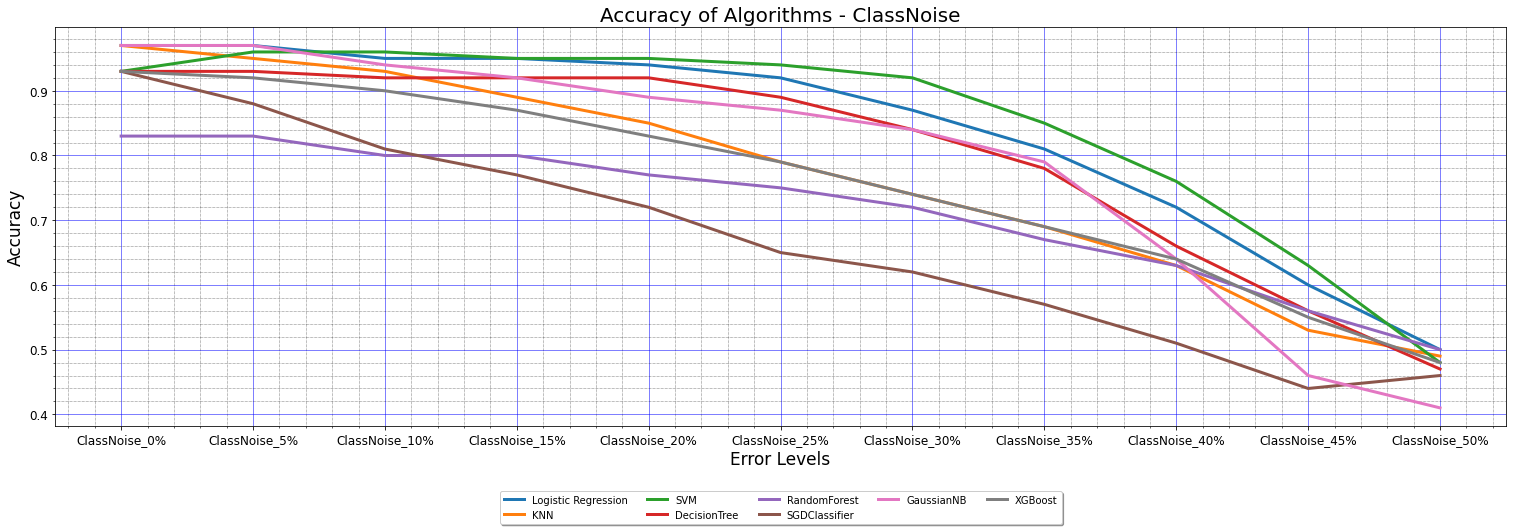

In [22]:
#Plotting the line graph for various noise levels
import matplotlib.pyplot as plt
n = len(class_noise_percentages)
plt.figure(figsize=(n+15,n/1.5))
for i in Algorithms:
    plt.plot(df.loc[i,:], label=i, linewidth=3)


plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title("Accuracy of Algorithms - ClassNoise",fontsize='20')
plt.xlabel('Error Levels',fontsize='17')
plt.ylabel('Accuracy',fontsize='17')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)


**Part 5: Generating barplots**

In [23]:
# The three variable generated in different_error_levels(input) function are combined to form a dataframe
Total_error_levels = len(class_noise_percentages)
dm = pd.DataFrame()
dm['Accuracies'] = sum(Accuracies,[])
dm['Class_Noise_Levels'] = sum(Level_name,[])
dm['Algos'] = sum(Algo_name,[])
dm

,Accuracies,Class_Noise_Levels,Algos
0,0.97,ClassNoise_0%,LogisticRegression
1,0.97,ClassNoise_0%,KNN
2,0.93,ClassNoise_0%,SVM
3,0.93,ClassNoise_0%,DecisionTree
4,0.83,ClassNoise_0%,RandomForest
...,...,...,...
8795,0.40,ClassNoise_50%,DecisionTree
8796,0.47,ClassNoise_50%,RandomForest
8797,0.17,ClassNoise_50%,SGDClassifier
8798,0.40,ClassNoise_50%,GaussianNB


In [24]:
#Selecting the levels of noise for box plots
#This piece of code needs user input

def get_n_levels():
  n_levels = input ("Enter the number of levels: "+str(len(class_noise_percentages)))
  levels = []
  for i in range(int(n_levels)):
    s = input("Enter the class noise % "+str(class_noise_percentages)+" :")
    levels.append("ClassNoise_"+str(s)+'%')  
  return (levels)


ans = 's'
levels = []
while(ans != "Y" and ans !="EXIT"):
  lev = []
  lev = get_n_levels()
  print(lev)
  ans = input(print(''' Do you want above levels: Y/N
  OR
  Enter EXIT to move out. '''))
  ans = ans.upper()
  Class_Noise_Levels = lev


Enter the number of levels: 1111
Enter the class noise % [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50] :0
Enter the class noise % [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50] :5
Enter the class noise % [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50] :10
Enter the class noise % [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50] :15
Enter the class noise % [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50] :20
Enter the class noise % [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50] :25
Enter the class noise % [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50] :30
Enter the class noise % [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50] :35
Enter the class noise % [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50] :40
Enter the class noise % [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50] :45
Enter the class noise % [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50] :50
['ClassNoise_0%', 'ClassNoise_5%', 'ClassNoise_10%', 'ClassNoise_15%', 'ClassNoise_20%', 'ClassNoise_25%', 'ClassNoise_30%', 'ClassNoise_35%', 'ClassNoise_40%', 'ClassNoise_45%', 'ClassNoi

In [25]:
#Selecting the Algorithms for box plots
#This piece of code needs user input

Algos = {1:'LogisticRegression',
         2:'KNN',
         3:'SVM',
         4:'DecisionTree',
         5:'RandomForest',
         6:'SGDClassifier',
         7:'GaussianNB',
         8:'XGBoost'}
print("Following Algos are availale:")
for i in Algos:
  print(str(i)+':'+Algos[i])


def get_algos():
  B_algos = []
  n_algos = input ("Enter the number of algos: ")
  for i in range(int(n_algos)):
    s = int(input("Enter the algo number: "))
    B_algos.append(Algos[s])
  return B_algos


ans = 's'
Box_algos = []
while(ans != "Y" and ans !="EXIT"):
  b = []
  b = get_algos()
  print(b)
  ans = input(print(''' Do you want above Algorithms in boxplots: Y/N
  OR 
  Enter EXIT to move out. '''))
  ans = ans.upper()
  Box_algos = b


Following Algos are availale:
1:LogisticRegression
2:KNN
3:SVM
4:DecisionTree
5:RandomForest
6:SGDClassifier
7:GaussianNB
8:XGBoost
Enter the number of algos: 8
Enter the algo number: 1
Enter the algo number: 2
Enter the algo number: 3
Enter the algo number: 4
Enter the algo number: 5
Enter the algo number: 6
Enter the algo number: 7
Enter the algo number: 8
['LogisticRegression', 'KNN', 'SVM', 'DecisionTree', 'RandomForest', 'SGDClassifier', 'GaussianNB', 'XGBoost']
 Do you want above Algorithms in boxplots: Y/N
  OR 
  Enter EXIT to move out. 
y


In [26]:
print("Algos used in Box plots: ",Box_algos)
print("Levels of noise used in Box plots: ",Class_Noise_Levels)

Algos used in Box plots:  ['LogisticRegression', 'KNN', 'SVM', 'DecisionTree', 'RandomForest', 'SGDClassifier', 'GaussianNB', 'XGBoost']
Levels of noise used in Box plots:  ['ClassNoise_0%', 'ClassNoise_5%', 'ClassNoise_10%', 'ClassNoise_15%', 'ClassNoise_20%', 'ClassNoise_25%', 'ClassNoise_30%', 'ClassNoise_35%', 'ClassNoise_40%', 'ClassNoise_45%', 'ClassNoise_50%']


In [27]:
#Selecting the data based on the inputs of levels and Algos provided by the user
box_data = dm[dm['Algos'].isin(Box_algos) & dm['Class_Noise_Levels'].isin(Class_Noise_Levels)]
box_data

,Accuracies,Class_Noise_Levels,Algos
0,0.97,ClassNoise_0%,LogisticRegression
1,0.97,ClassNoise_0%,KNN
2,0.93,ClassNoise_0%,SVM
3,0.93,ClassNoise_0%,DecisionTree
4,0.83,ClassNoise_0%,RandomForest
...,...,...,...
8795,0.40,ClassNoise_50%,DecisionTree
8796,0.47,ClassNoise_50%,RandomForest
8797,0.17,ClassNoise_50%,SGDClassifier
8798,0.40,ClassNoise_50%,GaussianNB


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


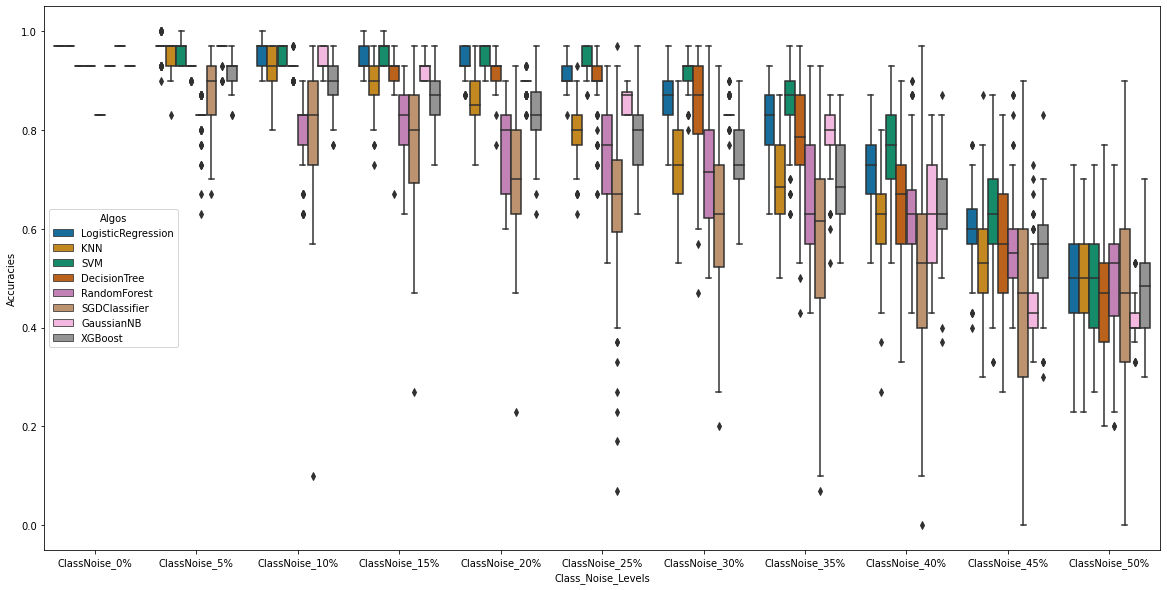

In [28]:
#Plotting the box plots of the selected data
import seaborn as sns
plt.figure(figsize=(20,10))
sns.boxplot(y='Accuracies', x='Class_Noise_Levels', 
                 data=box_data, 
                 palette="colorblind",
                 hue='Algos')